<a href="https://colab.research.google.com/github/v5v5/data-euro-2020/blob/main/data_euro_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [33]:
import pandas as pd

In [34]:
df = pd.read_excel("data-euro-2020.xlsx")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Дата Время               42 non-null     object 
 1   Этап соревнования        42 non-null     object 
 2   Команда 1                42 non-null     object 
 3   Команда 2                42 non-null     object 
 4   Голы команды 1           42 non-null     int64  
 5   Голы команды 2           42 non-null     int64  
 6   Примечание               3 non-null      object 
 7   Удары по воротам 1       42 non-null     int64  
 8   Удары по воротам 2       42 non-null     int64  
 9   Удары в створ 1          42 non-null     int64  
 10  Удары в створ 2          42 non-null     int64  
 11  Фолы 1                   42 non-null     int64  
 12  Фолы 2                   42 non-null     int64  
 13  Угловые 1                42 non-null     int64  
 14  Угловые 2                42 

In [36]:
df.head(3)

,Дата Время,Этап соревнования,Команда 1,Команда 2,Голы команды 1,Голы команды 2,Примечание,Удары по воротам 1,Удары по воротам 2,Удары в створ 1,Удары в створ 2,Фолы 1,Фолы 2,Угловые 1,Угловые 2,Офсайды 1,Офсайды 2,% владения мячом 1,% владения мячом 2,Заблокированные удары 1,Заблокированные удары 2,Штрафные удары 1,Штрафные удары 2,Удары от ворот 1,Удары от ворот 2,Ауты 1,Ауты 2,Предупреждения 1,Предупреждения 2,Удаления 1,Удаления 2
0,11.06.2021 22:00,Группа A. 1-й тур,Турция,Италия,0,3,NaN,3,24,0,8,10,8,2,8,2,4,37,63,2.0,5.0,8,10,11,3,12,33,2,0,0,0
1,12.06.2021 16:00,Группа A. 1-й тур,Уэльс,Швейцария,1,1,NaN,9,18,2,4,6,9,4,12,0,4,36,64,6.0,7.0,9,6,9,8,11,17,1,2,0,0
2,12.06.2021 19:00,Группа B. 1-й тур,Дания,Финляндия,0,1,NaN,22,1,6,1,11,12,9,0,0,1,70,30,6.0,0.0,12,9,1,11,18,19,0,2,0,0


In [37]:
df.columns

Index(['Дата Время', 'Этап соревнования', 'Команда 1', 'Команда 2',
       'Голы команды 1', 'Голы команды 2', 'Примечание', 'Удары по воротам 1',
       'Удары по воротам 2', 'Удары в створ 1', 'Удары в створ 2', 'Фолы 1',
       'Фолы 2', 'Угловые 1', 'Угловые 2', 'Офсайды 1', 'Офсайды 2',
       '% владения мячом 1', '% владения мячом 2', 'Заблокированные удары 1',
       'Заблокированные удары 2', 'Штрафные удары 1', 'Штрафные удары 2',
       'Удары от ворот 1', 'Удары от ворот 2', 'Ауты 1', 'Ауты 2',
       'Предупреждения 1', 'Предупреждения 2', 'Удаления 1', 'Удаления 2'],
      dtype='object')

In [38]:
df[['Дата Время', 'Команда 1', 'Команда 2']].head(3)

,Дата Время,Команда 1,Команда 2
0,11.06.2021 22:00,Турция,Италия
1,12.06.2021 16:00,Уэльс,Швейцария
2,12.06.2021 19:00,Дания,Финляндия


In [39]:
# cоздать новую колонку в формате datetime из другой колонки, содержащей строковое значение даты/времени
df['Date Time'] = pd.to_datetime(df['Дата Время'], dayfirst=True)

In [40]:
df.head(3)

,Дата Время,Этап соревнования,Команда 1,Команда 2,Голы команды 1,Голы команды 2,Примечание,Удары по воротам 1,Удары по воротам 2,Удары в створ 1,Удары в створ 2,Фолы 1,Фолы 2,Угловые 1,Угловые 2,Офсайды 1,Офсайды 2,% владения мячом 1,% владения мячом 2,Заблокированные удары 1,Заблокированные удары 2,Штрафные удары 1,Штрафные удары 2,Удары от ворот 1,Удары от ворот 2,Ауты 1,Ауты 2,Предупреждения 1,Предупреждения 2,Удаления 1,Удаления 2,Date Time
0,11.06.2021 22:00,Группа A. 1-й тур,Турция,Италия,0,3,NaN,3,24,0,8,10,8,2,8,2,4,37,63,2.0,5.0,8,10,11,3,12,33,2,0,0,0,2021-06-11 22:00:00
1,12.06.2021 16:00,Группа A. 1-й тур,Уэльс,Швейцария,1,1,NaN,9,18,2,4,6,9,4,12,0,4,36,64,6.0,7.0,9,6,9,8,11,17,1,2,0,0,2021-06-12 16:00:00
2,12.06.2021 19:00,Группа B. 1-й тур,Дания,Финляндия,0,1,NaN,22,1,6,1,11,12,9,0,0,1,70,30,6.0,0.0,12,9,1,11,18,19,0,2,0,0,2021-06-12 19:00:00


In [41]:
# создать новые дублирующие строки, но с перевернутыми некоторыми колонками т.е. колонками 'Команда 1', 'Команда 2' и 'Голы команды 1', 'Голы команды 2' и т.д.
df_copy = df.copy(deep=True)
for index, row in df_copy.iterrows():
  for column in df_copy.columns:
    column_last_symbol = column[-1]
    if not column_last_symbol.isnumeric():
      # print('NaN')
      continue
    # print('1 or 2')
    column_without_symbol = column[:-1]
    if column_last_symbol == '1':
      df_copy.at[index, column_without_symbol + '1'] = df.at[index, column_without_symbol + '2']
    else:
      df_copy.at[index, column_without_symbol + '2'] = df.at[index, column_without_symbol + '1']

# df_copy.info()

In [42]:
df_copy.head(3)

,Дата Время,Этап соревнования,Команда 1,Команда 2,Голы команды 1,Голы команды 2,Примечание,Удары по воротам 1,Удары по воротам 2,Удары в створ 1,Удары в створ 2,Фолы 1,Фолы 2,Угловые 1,Угловые 2,Офсайды 1,Офсайды 2,% владения мячом 1,% владения мячом 2,Заблокированные удары 1,Заблокированные удары 2,Штрафные удары 1,Штрафные удары 2,Удары от ворот 1,Удары от ворот 2,Ауты 1,Ауты 2,Предупреждения 1,Предупреждения 2,Удаления 1,Удаления 2,Date Time
0,11.06.2021 22:00,Группа A. 1-й тур,Италия,Турция,3,0,NaN,24,3,8,0,8,10,8,2,4,2,63,37,5.0,2.0,10,8,3,11,33,12,0,2,0,0,2021-06-11 22:00:00
1,12.06.2021 16:00,Группа A. 1-й тур,Швейцария,Уэльс,1,1,NaN,18,9,4,2,9,6,12,4,4,0,64,36,7.0,6.0,6,9,8,9,17,11,2,1,0,0,2021-06-12 16:00:00
2,12.06.2021 19:00,Группа B. 1-й тур,Финляндия,Дания,1,0,NaN,1,22,1,6,12,11,0,9,1,0,30,70,0.0,6.0,9,12,11,1,19,18,2,0,0,0,2021-06-12 19:00:00


In [43]:
df0 = df.append(df_copy, ignore_index=True)

In [44]:
def calculator_scores(row):
  if row['Голы команды 1'] > row['Голы команды 2']:
    score = 3
  elif row['Голы команды 1'] == row['Голы команды 2']:
    score = 1
  else:
    score = 0
  return score

df0['Очки'] = df0.apply(calculator_scores, axis=1)

In [45]:
df0['Победа'] = df0['Голы команды 1'] > df0['Голы команды 2']

In [46]:
df0.head(6)

,Дата Время,Этап соревнования,Команда 1,Команда 2,Голы команды 1,Голы команды 2,Примечание,Удары по воротам 1,Удары по воротам 2,Удары в створ 1,Удары в створ 2,Фолы 1,Фолы 2,Угловые 1,Угловые 2,Офсайды 1,Офсайды 2,% владения мячом 1,% владения мячом 2,Заблокированные удары 1,Заблокированные удары 2,Штрафные удары 1,Штрафные удары 2,Удары от ворот 1,Удары от ворот 2,Ауты 1,Ауты 2,Предупреждения 1,Предупреждения 2,Удаления 1,Удаления 2,Date Time,Очки,Победа
0,11.06.2021 22:00,Группа A. 1-й тур,Турция,Италия,0,3,NaN,3,24,0,8,10,8,2,8,2,4,37,63,2.0,5.0,8,10,11,3,12,33,2,0,0,0,2021-06-11 22:00:00,0,False
1,12.06.2021 16:00,Группа A. 1-й тур,Уэльс,Швейцария,1,1,NaN,9,18,2,4,6,9,4,12,0,4,36,64,6.0,7.0,9,6,9,8,11,17,1,2,0,0,2021-06-12 16:00:00,1,False
2,12.06.2021 19:00,Группа B. 1-й тур,Дания,Финляндия,0,1,NaN,22,1,6,1,11,12,9,0,0,1,70,30,6.0,0.0,12,9,1,11,18,19,0,2,0,0,2021-06-12 19:00:00,0,False
3,12.06.2021 22:00,Группа B. 1-й тур,Бельгия,Россия,3,0,NaN,9,5,4,1,9,11,2,4,0,4,66,34,2.0,1.0,10,8,7,6,28,20,0,0,0,0,2021-06-12 22:00:00,3,True
4,13.06.2021 16:00,Группа D. 1-й тур,Англия,Хорватия,1,0,NaN,8,8,2,2,9,10,1,1,2,2,50,50,2.0,1.0,9,8,8,10,14,21,1,3,0,0,2021-06-13 16:00:00,3,True
5,13.06.2021 19:00,Группа C. 1-й тур,Австрия,Северная Македония,3,1,NaN,10,7,6,2,13,16,4,0,1,0,63,37,2.0,2.0,16,13,5,7,29,28,1,2,0,0,2021-06-13 19:00:00,3,True


In [47]:
df0.set_index('Date Time', inplace=True)

In [48]:
df0.sort_values(by=['Date Time'], inplace=True)

In [49]:
df0.head(6)

,Дата Время,Этап соревнования,Команда 1,Команда 2,Голы команды 1,Голы команды 2,Примечание,Удары по воротам 1,Удары по воротам 2,Удары в створ 1,Удары в створ 2,Фолы 1,Фолы 2,Угловые 1,Угловые 2,Офсайды 1,Офсайды 2,% владения мячом 1,% владения мячом 2,Заблокированные удары 1,Заблокированные удары 2,Штрафные удары 1,Штрафные удары 2,Удары от ворот 1,Удары от ворот 2,Ауты 1,Ауты 2,Предупреждения 1,Предупреждения 2,Удаления 1,Удаления 2,Очки,Победа
Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-11 22:00:00,11.06.2021 22:00,Группа A. 1-й тур,Турция,Италия,0,3,NaN,3,24,0,8,10,8,2,8,2,4,37,63,2.0,5.0,8,10,11,3,12,33,2,0,0,0,0,False
2021-06-11 22:00:00,11.06.2021 22:00,Группа A. 1-й тур,Италия,Турция,3,0,NaN,24,3,8,0,8,10,8,2,4,2,63,37,5.0,2.0,10,8,3,11,33,12,0,2,0,0,3,True
2021-06-12 16:00:00,12.06.2021 16:00,Группа A. 1-й тур,Уэльс,Швейцария,1,1,NaN,9,18,2,4,6,9,4,12,0,4,36,64,6.0,7.0,9,6,9,8,11,17,1,2,0,0,1,False
2021-06-12 16:00:00,12.06.2021 16:00,Группа A. 1-й тур,Швейцария,Уэльс,1,1,NaN,18,9,4,2,9,6,12,4,4,0,64,36,7.0,6.0,6,9,8,9,17,11,2,1,0,0,1,False
2021-06-12 19:00:00,12.06.2021 19:00,Группа B. 1-й тур,Дания,Финляндия,0,1,NaN,22,1,6,1,11,12,9,0,0,1,70,30,6.0,0.0,12,9,1,11,18,19,0,2,0,0,0,False
2021-06-12 19:00:00,12.06.2021 19:00,Группа B. 1-й тур,Финляндия,Дания,1,0,NaN,1,22,1,6,12,11,0,9,1,0,30,70,0.0,6.0,9,12,11,1,19,18,2,0,0,0,3,True


In [50]:
df_group = df0.groupby('Команда 1')

In [51]:
df_agg = df_group.mean()

In [52]:
df_agg['Разница мячей'] = df_agg['Голы команды 1'] - df_agg['Голы команды 2']

In [53]:
# df_agg.sort_values(by=['% владения мячом 1'], ascending=False)
df_agg.sort_values(by=['Победа', 'Разница мячей'], ascending=False)
# df_agg.sort_values(by=['Очки', 'Разница мячей', 'Голы команды 1', 'Победа'], ascending=False)

,Голы команды 1,Голы команды 2,Удары по воротам 1,Удары по воротам 2,Удары в створ 1,Удары в створ 2,Фолы 1,Фолы 2,Угловые 1,Угловые 2,Офсайды 1,Офсайды 2,% владения мячом 1,% владения мячом 2,Заблокированные удары 1,Заблокированные удары 2,Штрафные удары 1,Штрафные удары 2,Удары от ворот 1,Удары от ворот 2,Ауты 1,Ауты 2,Предупреждения 1,Предупреждения 2,Удаления 1,Удаления 2,Очки,Победа,Разница мячей
Команда 1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Италия,2.250000,0.250000,21.750000,7.000000,5.750000,1.250000,10.500000,14.000000,5.500000,2.000000,3.250000,2.000000,58.000000,42.000000,5.750000,1.750000,13.500000,10.250000,6.000000,11.000000,23.750000,17.500000,0.750000,1.750000,0.000000,0.250000,3.000000,1.000000,2.000000
Бельгия,2.000000,0.250000,9.500000,14.000000,4.250000,2.750000,11.750000,8.500000,2.750000,2.500000,1.250000,2.250000,55.500000,44.500000,1.500000,4.750000,7.750000,11.250000,9.250000,5.250000,19.500000,14.500000,0.750000,1.500000,0.000000,0.000000,3.000000,1.000000,1.750000
Нидерланды,2.000000,1.000000,13.000000,10.250000,4.500000,3.000000,10.000000,9.750000,5.000000,4.000000,2.250000,1.250000,55.000000,45.000000,3.250000,2.750000,9.750000,9.250000,6.500000,8.000000,18.500000,15.750000,0.750000,2.000000,0.250000,0.000000,2.250000,0.750000,1.000000
Англия,0.666667,0.000000,8.000000,8.666667,2.000000,1.666667,11.000000,11.333333,4.333333,3.333333,3.000000,1.333333,55.333333,44.666667,1.333333,3.000000,10.333333,9.333333,7.666667,7.333333,15.333333,16.666667,0.333333,1.333333,0.000000,0.000000,2.333333,0.666667,0.666667
Швеция,1.333333,0.666667,9.333333,15.000000,3.000000,3.666667,13.333333,9.000000,4.666667,7.333333,0.666667,2.000000,30.000000,70.000000,2.666667,5.000000,8.333333,13.000000,10.000000,3.666667,18.333333,18.666667,1.000000,1.666667,0.000000,0.000000,2.333333,0.666667,0.666667
Испания,2.750000,1.000000,17.750000,6.000000,7.250000,2.500000,10.000000,17.000000,7.000000,0.750000,1.500000,2.500000,73.750000,26.250000,3.666667,0.666667,16.750000,9.250000,3.500000,8.250000,19.250000,19.000000,1.000000,2.250000,0.000000,0.000000,2.000000,0.500000,1.750000
Дания,2.250000,1.000000,18.750000,6.000000,7.250000,2.250000,10.750000,13.000000,6.750000,1.500000,0.750000,1.500000,58.500000,41.500000,5.250000,1.500000,12.750000,9.750000,3.250000,10.000000,19.000000,19.000000,1.000000,2.250000,0.000000,0.250000,1.500000,0.500000,1.250000
Чехия,1.250000,0.500000,10.000000,10.750000,3.500000,2.250000,10.500000,7.500000,4.750000,5.500000,1.750000,2.750000,46.250000,53.750000,2.000000,4.000000,7.000000,10.500000,5.750000,7.750000,22.250000,22.500000,1.250000,0.750000,0.000000,0.250000,1.750000,0.500000,0.750000
Австрия,1.250000,1.250000,13.250000,13.250000,3.500000,3.250000,13.750000,12.250000,5.250000,2.500000,1.250000,1.500000,53.750000,46.250000,3.500000,4.250000,12.000000,13.500000,7.750000,8.750000,25.500000,25.250000,1.000000,1.250000,0.000000,0.000000,1.500000,0.500000,0.000000


In [54]:
teams = df_agg.index.values
teams

array(['Австрия', 'Англия', 'Бельгия', 'Венгрия', 'Германия', 'Дания',
       'Испания', 'Италия', 'Нидерланды', 'Польша', 'Португалия',
       'Россия', 'Северная Македония', 'Словакия', 'Турция', 'Украина',
       'Уэльс', 'Финляндия', 'Франция', 'Хорватия', 'Чехия', 'Швейцария',
       'Швеция', 'Шотландия'], dtype=object)

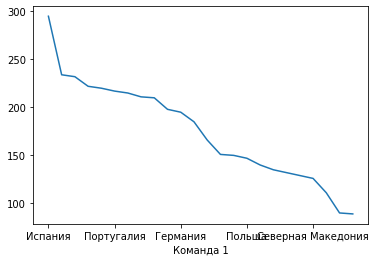

In [55]:
df0.groupby('Команда 1').sum().sort_values(by='% владения мячом 1', ascending=False)['% владения мячом 1'].plot()

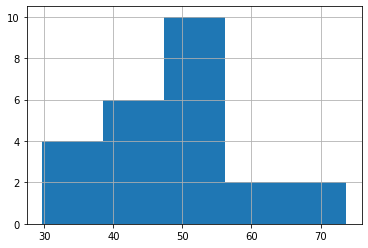

In [56]:
df_agg['% владения мячом 1'].hist(bins=5)

In [57]:
df_agg.corr().round(3)

,Голы команды 1,Голы команды 2,Удары по воротам 1,Удары по воротам 2,Удары в створ 1,Удары в створ 2,Фолы 1,Фолы 2,Угловые 1,Угловые 2,Офсайды 1,Офсайды 2,% владения мячом 1,% владения мячом 2,Заблокированные удары 1,Заблокированные удары 2,Штрафные удары 1,Штрафные удары 2,Удары от ворот 1,Удары от ворот 2,Ауты 1,Ауты 2,Предупреждения 1,Предупреждения 2,Удаления 1,Удаления 2,Очки,Победа,Разница мячей
Голы команды 1,1.000,-0.383,0.645,-0.633,0.854,-0.673,-0.143,0.229,0.380,-0.659,0.241,0.211,0.696,-0.696,0.020,-0.440,0.268,-0.156,-0.588,0.401,0.395,-0.508,-0.255,0.699,0.039,0.175,0.592,0.515,0.813
Голы команды 2,-0.383,1.000,-0.155,0.429,-0.207,0.783,0.331,0.124,-0.109,0.343,-0.111,-0.389,-0.254,0.254,0.178,0.176,0.131,0.354,0.200,0.027,-0.162,0.282,0.734,-0.294,0.072,-0.172,-0.872,-0.834,-0.849
Удары по воротам 1,0.645,-0.155,1.000,-0.561,0.802,-0.424,-0.037,0.401,0.780,-0.499,0.161,0.182,0.681,-0.681,0.480,-0.596,0.420,-0.059,-0.591,0.730,0.349,-0.222,-0.152,0.452,0.009,0.293,0.237,0.222,0.467
Удары по воротам 2,-0.633,0.429,-0.561,1.000,-0.554,0.806,0.306,-0.225,-0.361,0.811,-0.312,-0.220,-0.648,0.648,-0.119,0.754,-0.203,0.363,0.882,-0.591,-0.347,0.282,0.494,-0.402,0.030,-0.261,-0.422,-0.345,-0.632
Удары в створ 1,0.854,-0.207,0.802,-0.554,1.000,-0.436,-0.089,0.243,0.616,-0.545,0.082,0.311,0.690,-0.690,0.238,-0.477,0.265,-0.116,-0.563,0.487,0.280,-0.295,-0.202,0.549,-0.008,0.086,0.304,0.243,0.618
Удары в створ 2,-0.673,0.783,-0.424,0.806,-0.436,1.000,0.227,-0.027,-0.301,0.663,-0.360,-0.244,-0.580,0.580,0.101,0.496,-0.028,0.274,0.644,-0.391,-0.423,0.373,0.620,-0.425,-0.004,-0.298,-0.785,-0.718,-0.878
Фолы 1,-0.143,0.331,-0.037,0.306,-0.089,0.227,1.000,-0.002,0.129,0.122,0.079,-0.413,-0.118,0.118,-0.067,0.285,0.005,0.983,0.208,0.080,0.055,0.289,0.468,-0.060,-0.084,-0.091,-0.218,-0.231,-0.290
Фолы 2,0.229,0.124,0.401,-0.225,0.243,-0.027,-0.002,1.000,0.180,-0.382,0.021,-0.350,0.245,-0.245,0.418,-0.148,0.990,0.003,-0.226,0.335,0.095,-0.063,0.164,0.537,-0.062,0.124,-0.056,-0.105,0.053
Угловые 1,0.380,-0.109,0.780,-0.361,0.616,-0.301,0.129,0.180,1.000,-0.222,0.043,0.186,0.593,-0.593,0.310,-0.390,0.201,0.068,-0.471,0.604,0.186,-0.080,-0.167,0.277,0.027,0.083,0.122,0.106,0.286
Угловые 2,-0.659,0.343,-0.499,0.811,-0.545,0.663,0.122,-0.382,-0.222,1.000,-0.371,-0.003,-0.706,0.706,-0.033,0.532,-0.371,0.175,0.677,-0.508,-0.334,0.289,0.426,-0.557,0.305,-0.160,-0.444,-0.409,-0.593


In [58]:
from sklearn.cluster import SpectralCoclustering
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [64]:
h1 = '% владения мячом 1'
h2 = 'Голы команды 1'
df_for_clustering = df_agg.reindex(columns=[h1, h2])
X = df_for_clustering.to_numpy()
X

array([[53.75      ,  1.25      ],
       [55.33333333,  0.66666667],
       [55.5       ,  2.        ],
       [29.66666667,  1.        ],
       [65.        ,  2.        ],
       [58.5       ,  2.25      ],
       [73.75      ,  2.75      ],
       [58.        ,  2.25      ],
       [55.        ,  2.        ],
       [49.        ,  1.33333333],
       [54.25      ,  1.75      ],
       [43.        ,  0.66666667],
       [42.        ,  0.66666667],
       [45.        ,  0.66666667],
       [50.        ,  0.33333333],
       [46.66666667,  1.33333333],
       [37.75      ,  0.75      ],
       [37.        ,  0.33333333],
       [52.5       ,  1.75      ],
       [49.5       ,  1.75      ],
       [46.25      ,  1.25      ],
       [52.75      ,  1.75      ],
       [30.        ,  1.33333333],
       [44.        ,  0.33333333]])

In [65]:
km = KMeans(n_clusters=5)

In [66]:
km.fit(X)
km.labels_

array([1, 1, 1, 4, 2, 1, 2, 1, 1, 3, 1, 0, 0, 3, 3, 3, 0, 0, 1, 3, 3, 1,
       4, 3], dtype=int32)

Text(0, 0.5, 'Голы команды 1')

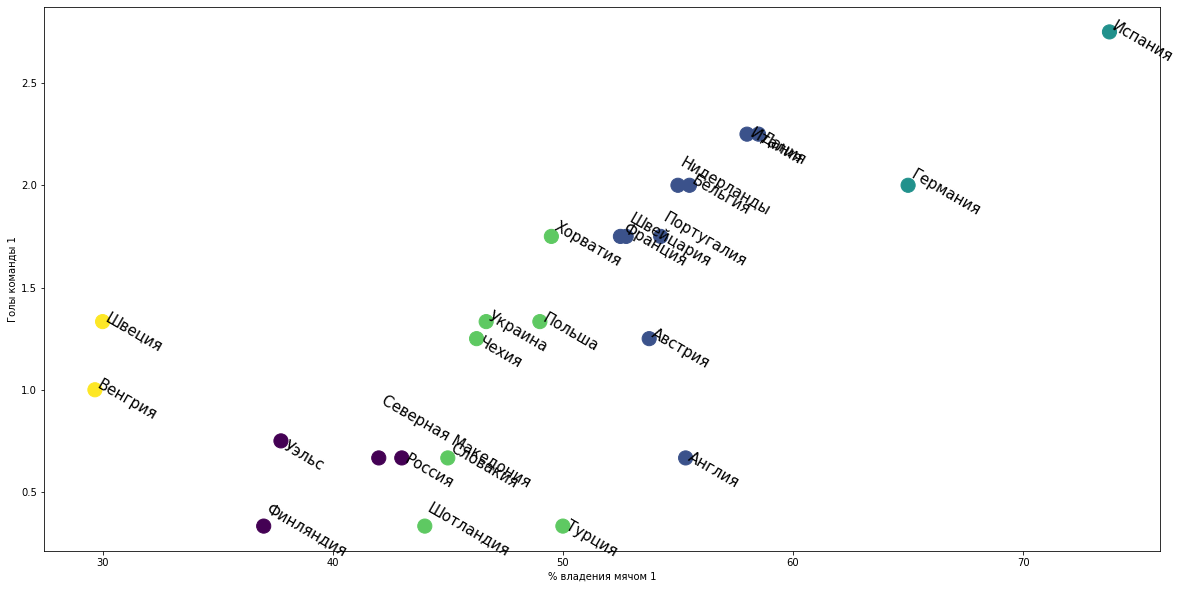

In [68]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(X[:,0], X[:,1], c = km.labels_, s=200)
for i, txt in enumerate(teams):
    ax.annotate(txt, (X[:,0][i], X[:,1][i]), fontsize=15, rotation=-30,
                xytext=(-0, -30), textcoords='offset points')
    # ax.text(X[:,0][i], X[:,1][i], txt, fontsize=15, rotation=45)
ax.set_xlabel(h1)
ax.set_ylabel(h2)